In [1]:
from emlib import emlib

DEBUG -211- Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
def NPZB_int(t,initial,dtinput,constants):

    P = initial[1]           # phytoplankton
    Z = initial[1]             # zooplankton
    B = initial[1]             # benthos
    DIN = initial[1]           # dissolved inorganic
    DON = initial[1]           # dissolved organic
    ddin = 0.0                 #code for when the model is run: ddin = dtinput.Val("ddin")
    ddon = 0.0                 #code for when the model is run: ddon = dtinput.Val("ddon")
    
    i = constants.Val("i")      #irradiance
    Pg = constants.Val("Pg")    # max P growth
    Bg = constants.Val("Bg")    # max B growth
    e = constants.Val("e")      # Z ingestion
    Zm = constants.Val("Zm")    # Z mortality
    Pm = constants.Val("Pm")    # P mortality
    Bm = constants.Val("Bm")    # B mortality
    Pe = constants.Val("Pe")    # P excretion
    Be = constants.Val("Be")    # B excretion
    Pr = constants.Val("Pr")    # P recycle
    h = constants.Val("h")      # Z grazing
    s = constants.Val("s")      # sedimentation
    
    P_dot = (i * Pg * P * DIN) + (Pr * DON * P) - (h * P * Z) - (Pm * P * P) - (Pe * P)
    Z_dot = ((2 * e - 1)*h * P * Z) - (Zm * Z * Z)-(0.8* (1 - e) * h * P * Z)-(0.2 * (1 - e) * h * P * Z)
    B_dot = (Bg * B)/ (1 + Bg * B) * (DON + DIN) - (Bm * B * B) - (Be * B)
    #DIN_dot = ddin + (0.8* (1 - e) * h * P * Z) + (Be * B) - (i * Pg * P) - ((Bg * B)/ (1 + Bg * B) * (DIN))
    #DON_dot = ddon + (Bm * B * B) + (Pm * P * P) + (Zm * Z * Z) + (Pe * P) + (0.2 * (1 - e) * h * P * Z) \
    #         - (Pr * DON * P) - ((Bg * B)/ (1 + Bg * B) * (DON)) - (s * DON)

    
    DIN_dot = ddin + (0.8* (1 - e) * h * P * Z) + (Be * B)+  (Pe * P) \
                - (i * Pg * P * DIN) - ((Bg * B)/ (1 + Bg * B) * (DIN))
    DON_dot = ddon + (Bm * B * B)  +(Pm * P * P)  + (Zm * Z * Z)  + (0.2 * (1 - e) * h * P * Z) \
             - (Pr * DON * P)  - ((Bg * B)/ (1 + Bg * B) * (DON)) 
    return [P_dot, Z_dot, B_dot, DIN_dot, DON_dot]

In [3]:
NPZB = emlib.Model(NPZB_int) #save the model

INFO -1105- New Model(1): NPZB_int
INFO -1117- No algorithm supplied assuming vode/bfd O12 Nsteps3000 dt1
DEBUG -1131- Integrator:vode/bdf order:12 nsteps:3000 dt:1


In [4]:
BB_Zoop= emlib.TimeSeries(dirname="Data",filename="BB_Zoop.csv")
BB_N= emlib.TimeSeries(dirname="Data",filename="BB_N.csv")
BB_MG= emlib.TimeSeries(dirname="Data",filename="BB_MG.csv")

INFO -880- New TimeSeries instance: 1
DEBUG -952- New INPUT table DataBB_Zoop.csv['Date', 'Zoop']
DEBUG -963- Saved 2 rows and 1 columns
DEBUG -965- Converted dates to contiguous np.array
DEBUG -967- Converted input data to contiguous np.array
INFO -880- New TimeSeries instance: 2
DEBUG -952- New INPUT table DataBB_N.csv['DATE', 'ddin', 'ddon']
DEBUG -963- Saved 13 rows and 2 columns
DEBUG -965- Converted dates to contiguous np.array
DEBUG -967- Converted input data to contiguous np.array
INFO -880- New TimeSeries instance: 3
DEBUG -952- New INPUT table DataBB_MG.csv['DATE', 'gm2']
DEBUG -963- Saved 60 rows and 1 columns
DEBUG -965- Converted dates to contiguous np.array
DEBUG -967- Converted input data to contiguous np.array


In [5]:
NPZBcalibration = emlib.Calibration()
NPZBcalibration.Add("i",val=1.0,isconst=True)#from Turner 2014
NPZBcalibration.Add("Pg",val=0.5,isconst=True)#from Turner 2014
NPZBcalibration.Add("Bg",val=0.1,isconst=True)#from Turner 2014
NPZBcalibration.Add("e",val=0.2,isconst=True)#from Turner 2014
NPZBcalibration.Add("Zm",val=0.2,isconst=True)#from Turner 2014
NPZBcalibration.Add("Pm",val=0.1,isconst=True)#from Turner 2014
NPZBcalibration.Add("Bm",val=0.1,isconst=True)#from Turner 2014
NPZBcalibration.Add("Pe",val=0.1,isconst=True)#random number
NPZBcalibration.Add("Be",val=0.1,isconst=True)#random number
NPZBcalibration.Add("Pr",val=0.3,isconst=True)#random number
NPZBcalibration.Add("h",val=0.3,min=0.1,max=100)#random moving number
NPZBcalibration.Add("s",val=0.15,isconst=True)#from Turner 2014
NPZBcalibration.initial=[1,1,1,1,1]

INFO -353- New Calibration instance: 1
DEBUG -596- C:1 i 1.0 True
DEBUG -596- C:2 Pg 0.5 True
DEBUG -596- C:3 Bg 0.1 True
DEBUG -596- C:4 e 0.2 True
DEBUG -596- C:5 Zm 0.2 True
DEBUG -596- C:6 Pm 0.1 True
DEBUG -596- C:7 Bm 0.1 True
DEBUG -596- C:8 Pe 0.1 True
DEBUG -596- C:9 Be 0.1 True
DEBUG -596- C:10 Pr 0.3 True
DEBUG -596- C:11 h 0.3 False
DEBUG -596- C:12 s 0.15 True


DEBUG -1138- ODEINT Initials:11111
DEBUG -1179- Ending in 3000 runs
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 3000 Remaining:3000
DEBUG -1205- Integration dT:500 of 3000 Remaining:2500
DEBUG -1205- Integration dT:1000 of 3000 Remaining:2000
DEBUG -1205- Integration dT:1500 of 3000 Remaining:1500
DEBUG -1205- Integration dT:2000 of 3000 Remaining:1000
DEBUG -1205- Integration dT:2500 of 3000 Remaining:500
DEBUG -1217- Completed Integration, created np.array shape:(3000, 5)
DEBUG -2515- update_title_pos
DEBUG -1254- findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\mrohal\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG -1254- findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to D

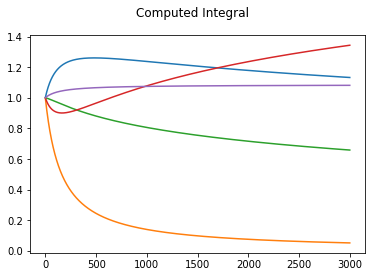

In [6]:
NPZB.Integrate(NPZBcalibration.initial,Calibration=NPZBcalibration,maxdt=30,dt=.01) #test of model stability
NPZB.Draw()

DEBUG -1138- ODEINT Initials:11111
DEBUG -1176- Starting:2013-07-18 Ending:13
DEBUG -1177- Passing DtInput:['ddin', 'ddon']
DEBUG -1183- Passing Cs:['i', 'Pg', 'Bg', 'e', 'Zm', 'Pm', 'Bm', 'Pe', 'Be', 'Pr', 'h', 's']
DEBUG -1205- Integration dT:0 of 13 Remaining:13
DEBUG -1217- Completed Integration, created np.array shape:(13, 5)
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos
DEBUG -2515- update_title_pos


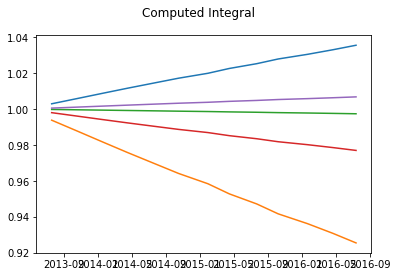

In [7]:
NPZB.Integrate(NPZBcalibration.initial,TimeSeries=BB_N, Calibration=NPZBcalibration) #run with nutrient timeseries (need more inputs)
NPZB.Draw()